In [1]:
#importovanje potrebnih biblioteka
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#uzimanje kvota sa berze u određenom vremenskom intervalu
df= web.DataReader('AAPL',data_source='yahoo',start='2010-01-01',end='2021-12-29')
#prikaz podataka 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118
...,...,...,...,...,...,...
2021-12-22,175.860001,172.149994,173.039993,175.639999,92135300.0,174.916183
2021-12-23,176.850006,175.270004,175.850006,176.279999,68356600.0,175.553543
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,179.586868


In [3]:
#broj kolona i redova data seta 
df.shape


(3019, 6)

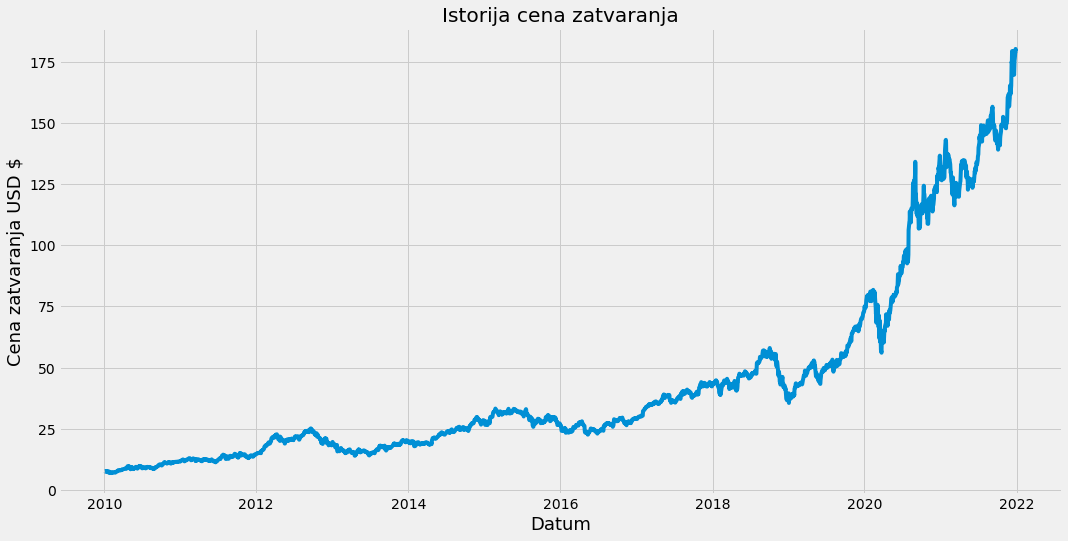

In [4]:
# prikazivanje cene zatvaranja
plt.figure(figsize=(16,8))
plt.title('Istorija cena zatvaranja')
plt.plot(df['Close'])
plt.xlabel('Datum',fontsize=18)
plt.ylabel('Cena zatvaranja USD $',fontsize=18)
plt.show()

In [5]:
#kreiranje novog frejma podataka sa kolonom 'Close'
data=df.filter(['Close'])
#smeštanje vrednosti kolone Close u dataset promenljivu
dataset=data.values
#uzimanje 80% podataka za treniranje
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

2416

In [6]:
#skaliranje podataka
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)

scaled_data

array([[0.00452113],
       [0.00459731],
       [0.00389525],
       ...,
       [1.        ],
       [0.99400471],
       [0.9945236 ]])

In [7]:
#kreiranje seta podataka za treniranje
train_data=scaled_data[0:training_data_len,:]
#razdvajanje podataka na x_train i y_train 
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
        

[array([4.52112883e-03, 4.59730631e-03, 3.89525473e-03, 3.81495680e-03,
       4.10319040e-03, 3.71819907e-03, 3.22613926e-03, 3.82936876e-03,
       3.57819722e-03, 2.85761599e-03, 4.73318495e-03, 4.05172463e-03,
       3.29819628e-03, 1.17351464e-03, 2.26879845e-03, 2.85967484e-03,
       3.25908362e-03, 1.49056939e-03, 2.05610186e-06, 5.51755483e-04,
       7.84400109e-04, 1.47821629e-03, 0.00000000e+00, 7.02046083e-04,
       4.26168341e-04, 8.52342181e-04, 6.32047909e-04, 1.36292340e-03,
       1.71498136e-03, 2.33674052e-03, 2.16174371e-03, 2.23997454e-03,
       1.98056485e-03, 1.72321402e-03, 1.03145669e-03, 1.77262918e-03,
       2.04850692e-03, 2.58791205e-03, 3.48761329e-03, 3.45878938e-03,
       3.55760597e-03, 3.84172186e-03, 5.53817907e-03, 5.56494413e-03,
       6.37611204e-03, 6.75081187e-03, 6.88669051e-03, 7.11316408e-03,
       6.54493505e-03, 6.67051944e-03, 6.60258012e-03, 6.71169645e-03,
       6.21758329e-03, 6.73228496e-03, 7.47551080e-03, 7.68345197e-03,
     

In [8]:
#konvertovanje x_train i y_train u numpy niz
x_train, y_train=np.array(x_train),np.array(y_train)

In [9]:
#oblikovanje podataka
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2356, 60, 1)

In [10]:
#LSTM model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [11]:
#kompajliranje modela
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#treniranje modela
model.fit(x_train,y_train,batch_size=1,epochs=1)

2356/2356 [==============================] - 34s 14ms/step - loss: 1.4215e-04


In [13]:
#kreiranje seta podataka za testiranje
#kreiranje novog niza koji sadrzi skaliranje vrednosti od indeksa 2356  do  2416
test_data=scaled_data[training_data_len-60: , :]
#kreiranje seta podataka x_test i y_test
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#konvertovanje podataka u numpy niz
x_test=np.array(x_test)

In [15]:
#oblikovanje podataka
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
#dobijanje predvidjene vrednosti cena modela
predictions=model.predict(x_test)

predictions=scaler.inverse_transform(predictions)

In [17]:
#RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

7.192438419778549

C:\Users\Master4\AppData\Local\Temp/ipykernel_13448/432205577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


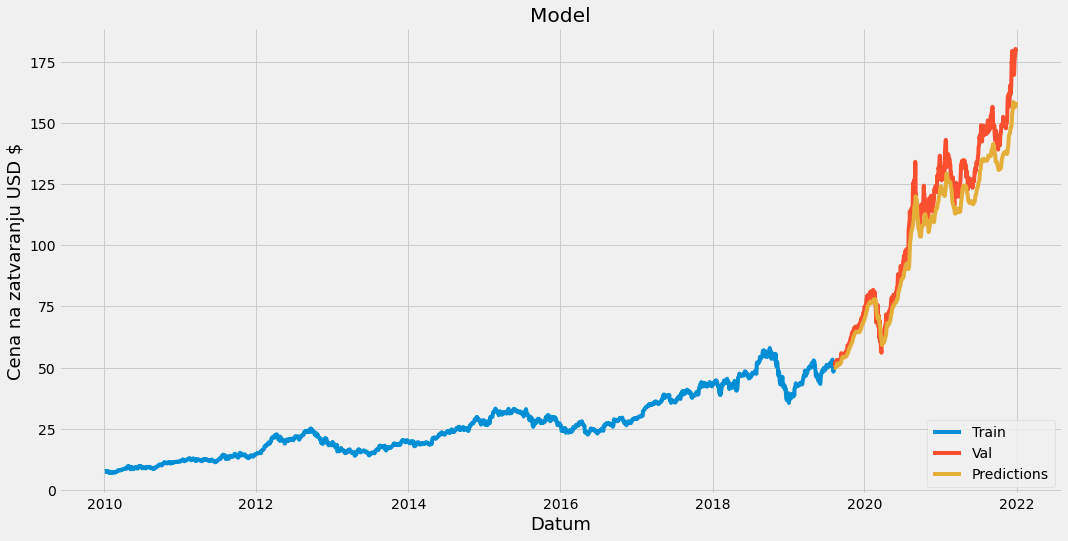

In [18]:
#zadavanje vrednosti promenljivama za treniranje i validaciju
train= data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#vizuelizacija
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Datum',fontsize=18)
plt.ylabel('Cena na zatvaranju USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [19]:
#prikaz predvidjene i prave cene
valid


,Close,Predictions
Date,,
2019-08-09,50.247501,50.053787
2019-08-12,50.119999,49.943600
2019-08-13,52.242500,49.872730
2019-08-14,50.687500,50.076374
2019-08-15,50.435001,50.214577
...,...,...
2021-12-22,175.639999,156.511459
2021-12-23,176.279999,156.492126
2021-12-27,180.330002,156.816574


In [20]:
#vrednost
apple_quoute=web.DataReader('AAPl',data_source='yahoo',start='2010-01-01',end='2021-12-29')
#novi okvir podataka
new_df=apple_quoute.filter(['Close'])
#uzimanje cene na zatvaranju prethodnih 60 dana i konvertovanje u niz
last_60_days=new_df[-60:].values
#skaliranje podataka izmedju 0 i 1
last_60_days_scaled=scaler.transform(last_60_days)
#kreiranje prazne liste
X_test=[]
#ubacivanje dana u listu
X_test.append(last_60_days_scaled)
#konvertovanje X_test seta podataka u numpy niz
X_test=np.array(X_test)
#oblikovanje u 3d 
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#skalirana cena koja je predvidjena
pred_price=model.predict(X_test)
#reiskaliranje
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[159.55528]]


In [21]:
apple_quoute2=web.DataReader('AAPL',data_source='yahoo',start='2021-12-30',end='2021-12-30')
print(apple_quoute2['Close'])

Date
2021-12-30    178.199997
Name: Close, dtype: float64
